In [2]:
import numpy as np
import copy
import math 
import random
import matplotlib.pyplot as plt

In [116]:
def Sandpile_2D(size, crit_values, sand_types, trails, prob = [], boundary_con = False, adding_method = "position", seed = 0):
    # basic sandpile model of given size (size by size matrix) with given critical value and trails
    # boundary_con is True walled model (sand is not removed) if False sand is removed from the sides
    # adding method; Where are the grains added using the add_sand function (position, random, normal)
    
    np.random.seed(seed)
    random.seed(seed)
    
    data = np.zeros(trails)
    Order = [-1, -2, -3, -4]
    A = np.zeros((size,size))
    Rep_3D = []
    
    for i in range(size):
        Rep_3D.append([])
        for j in range(size):
             Rep_3D[i].append([])
    
    if prob == []:
        prob = [1/sand_types] * sand_types      
        
    for k in range(trails):
        # add sand to the model
        pos = add_sand(A, size, adding_method)
        Sand_type = np.random.choice(np.arange(1, 1 + sand_types), p=prob)
        Rep_3D[pos[0]][pos[1]].append(Sand_type)
        
        # update the model simetaniously

        B = copy.deepcopy(A)
        avalage, control =  [0,0]
        while True:
            for i in range(0, size):
                for j in range(0, size):
                    if not Rep_3D[i][j]:
                        continue
                    
                    Temp_type = Rep_3D[i][j][-1]
                    if  A[i][j] - min(neigbours(B, [i,j])[0]) >= crit_values[Temp_type - 1] and B[i][j] >= 4:
                        
                        avalage += 1
                        # add to surrounding area
                        random.shuffle(Order)
                        itter = 0
                        for adj in range(-1, 2, 2):
                            if neigbours(A, [i,j])[1][itter] == 1:
                                A[i+ adj][j] += 1
                                Rep_3D[i+ adj][j].append(Rep_3D[i][j][Order[itter]])
                            itter += 1

                            if neigbours(A, [i,j])[1][itter] == 1:
                                A[i][j + adj] += 1
                                Rep_3D[i][j + adj].append(Rep_3D[i][j][Order[itter]])
                            itter += 1

                        # implement the boundary condition and lower the pile at critical value
                        if boundary_con == True:
                            A[i][j] -= sum(neigbours(A, [i,j])[1])
                            for r in range(int(sum(neigbours(A, [i,j])[1]))):
                                Rep_3D[i][j].pop()
                        else:
                            A[i][j] -= 4
                            for r in range(4):
                                Rep_3D[i][j].pop()
            
            if control == avalage:
                data[k] = avalage
                break
                    
            control = avalage
                    
    return A, Rep_3D, data

In [26]:
def neigbours(matrix, cord):
    # find the neibour values of a given cell
    # Returns the values and gives the neigbours that exist given the dataset
    # in order: left, upper, right and down neigbouring cells.
    
    neigbours = list()
    real = np.zeros(4)
    
    if cord[0] >= 1:
        neigbours.append(matrix[cord[0] - 1][cord[1]])
        real[0] += 1
    if cord[1] >= 1:
        neigbours.append(matrix[cord[0]][cord[1] - 1])
        real[1] += 1
    
    if cord[0] < len(matrix) - 1:
        neigbours.append(matrix[cord[0] + 1][cord[1]])
        real[2] += 1
    if cord[1] < len(matrix) - 1:
        neigbours.append(matrix[cord[0]][cord[1] + 1])
        real[3] += 1
        
    return neigbours, real

In [115]:
def add_sand(Matrix, size, method, cords = [-1, -1], std = -1):
    # add value to matrix using various methods'
    # position: at given postion standard is center
    # random: at random position
    # normal: at a normal distribution with given stanardard deviation around given position
    # standard postion is center and standard deviation is 1/6 th of the matrix size (3 SD intervall covers 99.9% of the matrix)
    
    if method.lower() == "random":
        randcords = [np.random.randint(size), np.random.randint(size)]
        Matrix[randcords[0]][randcords[1]] += 1
        return randcords
    
    # set values of cordinates if no values are given
    if cords[0] == -1:
        cords[0] = math.floor(size/2)
    if cords[1] == -1:
        cords[1] = math.floor(size/2)
    
    if method.lower() == "position":
        Matrix[cords[0]][cords[1]] += 1
        return cords
    
    if method.lower() == "normal":
        # set value of standard deviation
        if std == -1:
            std = math.ceil(size/6)
        
        randcords = [max(min(int(np.round(np.random.normal(cords[0], std))), size - 1),0), max(min(int(np.round(np.random.normal(cords[1], std))), size - 1),0)]
        Matrix[randcords[0]][randcords[1]] += 1
        return randcords

(array([6.432e+03, 1.012e+03, 6.520e+02, 4.900e+02, 3.640e+02, 2.890e+02,
        2.080e+02, 1.340e+02, 1.180e+02, 8.300e+01, 6.400e+01, 4.700e+01,
        2.900e+01, 1.900e+01, 1.800e+01, 1.300e+01, 1.100e+01, 4.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

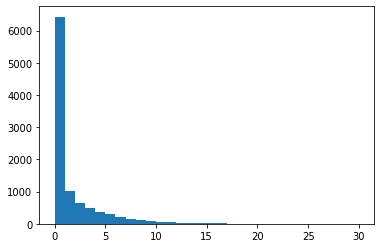

In [79]:
M, C_M, ava = Sandpile_2D(5, [4, 10], 2, 10000)
plt.hist(ava, bins=30, range = [0, 30])

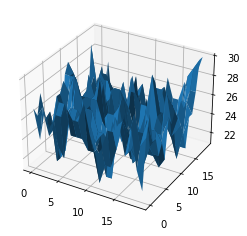

In [121]:
matrix, C_Matrix, ava = Sandpile_2D(20, [4,5,6,7], 4, 10000, prob = [0.1, 0.2, 0.3, 0.4], boundary_con = True, adding_method = "random", seed = 1)
# Set up grid and test data
nx, ny = 20, 20
x = range(nx)
y = range(ny)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, matrix)

plt.show()